In [56]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [57]:
data = pd.read_csv('creditcard.csv',sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [58]:
data.isnull().values.any()

False

<Axes: >

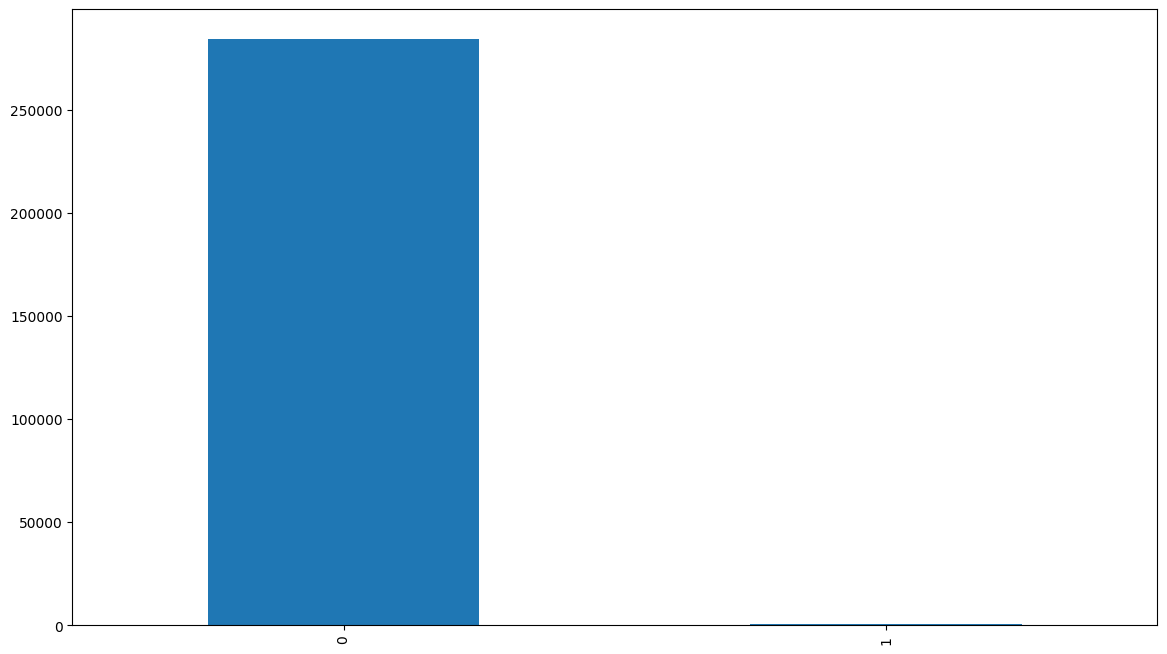

In [59]:
value_count = pd.value_counts(data['Class'])
value_count.plot(kind='bar')

In [60]:
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

In [61]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [62]:
X = data.iloc[:,:-1]
Y= data['Class']

In [49]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_res, y_res=nm.fit_resample(X,Y)

In [50]:
X_res.shape, y_res.shape

((984, 30), (984,))

In [53]:
from collections import Counter
Counter(Y)

Counter({0: 284315, 1: 492})

In [55]:
Counter(y_res)

Counter({0: 492, 1: 492})

In [67]:
from imblearn.over_sampling import RandomOverSampler


In [75]:
os =  RandomOverSampler(sampling_strategy=1)
X_res,Y_res= os.fit_resample(X,Y)

In [76]:
X_res.shape,Y_res.shape

((568630, 30), (568630,))

In [77]:
Counter(Y)

Counter({0: 284315, 1: 492})

In [78]:
Counter(Y_res)

Counter({0: 284315, 1: 284315})